 # Salary Prediction

### Importing required Libraries

In [1]:
import pandas as pd

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from CSV file in to Pandas DataFrame

In [4]:
dataset = pd.read_csv('../../data/salaries.csv')

In [5]:
dataset.head() #displaying the records from pandas dataframe

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


In [6]:
dataset.info()  #displaying information like column names,no of records,datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [7]:
dataset.isna().sum()  ##checking for the number of missing values in each column

Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64

In [8]:
dataset[dataset['Salary'].isna()] ## displaying the rows with missing values in Salary column

,Company,Company Score,Job Title,Location,Date,Salary
764,January Technologies,4.5,Software Engineer III,"Fort Collins, CO",12d,NaN
765,Zebra Technologies,4.1,JavaScript Software Engineer – Analytics UI Team,"Indianapolis, IN",4d,NaN
766,Credit One Bank,3.8,"Software Engineer, Borrower Activation",United States,12d,NaN
767,Visa,3.8,"DevSecOps Software Engineer, II","Holtsville, NY",30d+,NaN
768,Foot Locker,4.6,Software Engineer I,"Las Vegas, NV",8d,NaN
...,...,...,...,...,...,...
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN


In [9]:
i = dataset[dataset['Salary'].isna()].index ## getting the index of the missing values in salary column in to i

In [10]:
dataset = dataset.drop(i) ## dropping the records with missing values in salary column 

In [11]:
dataset.isna().sum() ## checking for missing values after cleaning up salary column

Company           0
Company Score     0
Job Title         0
Location         11
Date              0
Salary            0
dtype: int64

In [12]:
dataset[dataset['Location'].isna()]  ## getting records with missing value in Location column

,Company,Company Score,Job Title,Location,Date,Salary
19,Megaport,3.4,Frontend Software Engineer,NaN,2d,$84K - $133K (Glassdoor est.)
44,McKesson,3.9,Software Engineer,NaN,2d,$88K - $124K (Glassdoor est.)
97,Careerus Soultions,4.0,DevOps Engineer,NaN,2d,$90K - $125K (Glassdoor est.)
103,Diverse Career Solutions,3.7,Software Engineer,NaN,2d,$48K - $81K (Glassdoor est.)
174,"First Command Financial Services, Inc.",4.2,Software Engineer,NaN,2d,$50.00 - $70.00 Per Hour (Employer est.)
264,Flysoft,5.0,Software Engineer,NaN,2d,$78K - $112K (Glassdoor est.)
298,Numerica Corporation,4.7,Mobile Engineer,NaN,2d,$71K - $104K (Glassdoor est.)
304,Northwest Talent Solutions LLC,3.6,Software Engineer 2,NaN,2d,$93K - $131K (Glassdoor est.)
360,IXL Learning,3.8,"Sr Software Engineer, Snowflake focus",NaN,2d,$54K - $83K (Employer est.)
394,Proteus Co.,3.5,Engineer II - Software,NaN,2d,$56K - $89K (Glassdoor est.)


In [13]:
i = dataset[dataset['Location'].isna()].index ## taking index of missing values in Location in to i

In [14]:
dataset = dataset.drop(i) ## dropping records with missing location values

In [15]:
##dataset = dataset.dropna()

In [16]:
dataset.isna().sum() ## checking if there are any missing values

Company          0
Company Score    0
Job Title        0
Location         0
Date             0
Salary           0
dtype: int64

In [17]:
dataset['Salary'].astype(str) ## converting salary column in to string datatype

0       $68K - $94K (Glassdoor est.)
1       $61K - $104K (Employer est.)
2      $95K - $118K (Glassdoor est.)
3       $97K - $145K (Employer est.)
4      $85K - $108K (Glassdoor est.)
                   ...              
759    $160K - $385K (Employer est.)
760            $222K (Employer est.)
761    $82K - $118K (Glassdoor est.)
762    $69K - $107K (Glassdoor est.)
763     $95K - $143K (Employer est.)
Name: Salary, Length: 753, dtype: object

In [18]:
## below is the UDF for finding min salary from the Salary column

def minsal(x):
    num = re.findall(r'\d+',x)        
    if 'hour' in x.lower() or 'hr' in x.lower():
        hourly_rate = float(num[0])
        annual_salary = hourly_rate * 40 * 52
        return int(annual_salary)
    if 'k' in x.lower():
        return int(float(num[0]) * 1000)
    return int(num[0])

In [19]:
## below is the UDF for finding max salary from the Salary column
def maxsal(x):
    num = re.findall(r'\d+',x)
    try:
        if 'hour' in x.lower() or 'hr' in x.lower():
            hourly_rate = float(num[1])
            annual_salary = hourly_rate * 40 * 52
            return int(annual_salary)
        if 'k' in x.lower():
            return int(float(num[1]) * 1000)
        return int(num[1])
        
    except IndexError:
        if 'hour' in x.lower() or 'hr' in x.lower():
            hourly_rate = float(num[0])
            annual_salary = hourly_rate * 40 * 52
            return int(annual_salary)
        if 'k' in x.lower():
            return int(float(num[0]) * 1000)
        return int(num[0])

In [20]:
## below is the UDF for obtaining the company that estimated from the Salary column
def EstimatedBy(x):
    text = re.findall(r'\((.*?)\)',x)
    text1 = text[0].split(" ")
    return text1[0]

In [21]:
dataset['min'] = dataset['Salary'].apply(minsal) ## creating new column for storing min salary

In [22]:
dataset['max'] = dataset['Salary'].apply(maxsal)## creating new column for storing max salary

In [23]:
dataset['EstimatedBy'] = dataset['Salary'].apply(EstimatedBy) ## creating new column for storing estimated by

In [24]:
dataset = dataset.drop('Salary',axis=1) ## dropping Salary column

In [25]:
dataset.head() ## displaying the dataframe

,Company,Company Score,Job Title,Location,Date,min,max,EstimatedBy
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,68000,94000,Glassdoor
1,Workiva,4.3,Software Support Engineer,Remote,2d,61000,104000,Employer
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,95000,118000,Glassdoor
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,97000,145000,Employer
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,85000,108000,Glassdoor


In [26]:
dataset['EstimatedBy'].value_counts() ##finding value counts of estimated by

EstimatedBy
Employer     433
Glassdoor    320
Name: count, dtype: int64

In [27]:
dataset['avgSalary']= (dataset['min']+dataset['max'])/2 ##creating the new column average salary from min and max

In [28]:
dataset.head(5)

,Company,Company Score,Job Title,Location,Date,min,max,EstimatedBy,avgSalary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,68000,94000,Glassdoor,81000.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,61000,104000,Employer,82500.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,95000,118000,Glassdoor,106500.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,97000,145000,Employer,121000.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,85000,108000,Glassdoor,96500.0


In [29]:
dataset.isna().sum()  

Company          0
Company Score    0
Job Title        0
Location         0
Date             0
min              0
max              0
EstimatedBy      0
avgSalary        0
dtype: int64

/Users/saibrahmanaidukaturi/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


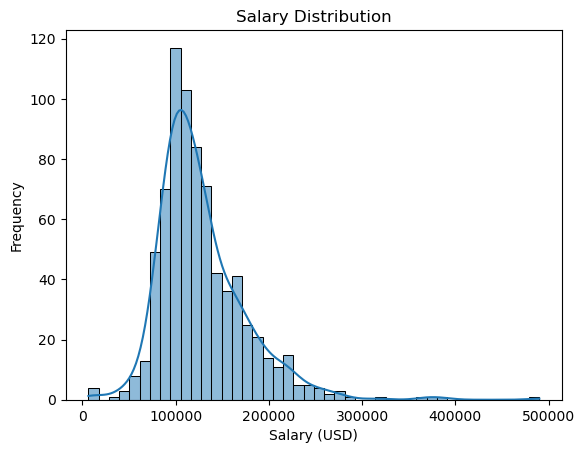

In [30]:
## checking the distribution of Salary
sns.histplot(dataset['avgSalary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

In [31]:
dataset['avgSalary'].describe() ## finding the key statistics like mean,std,min,max of salary column

count       753.000000
mean     127952.908367
std       47501.126136
min        6500.000000
25%       98000.000000
50%      117500.000000
75%      149000.000000
max      490000.000000
Name: avgSalary, dtype: float64

In [32]:
skewness = dataset['avgSalary'].skew() ## checking for skewness
print(f'Skewness: {skewness}')

Skewness: 1.794272747176507


In [33]:
dataset['Job Title'].value_counts() ## finding the value counts of Job title

Job Title
Software Engineer                             139
Senior Software Engineer                       32
Software Engineer II                           17
Software Developer                             13
DevOps Engineer                                 8
                                             ... 
Software Engineer - API, Java, Spring Boot      1
SOFTWARE ENGINEER TRAINEE                       1
Associate Software Developer                    1
SoftWare Engineer II                            1
ATM Software Engineer (Level III)               1
Name: count, Length: 468, dtype: int64

In [34]:
## below is the userdefined function for standardizing the job title
def standardize_title(text):
    # Convert text to title case
    text = text.title()
    
    # Regular expression to match Roman numerals
    roman_numerals = re.compile(r'\b(I|II|III|IV|V|VI|VII|VIII|IX|X)\b', re.IGNORECASE)
    
    # Convert matched Roman numerals back to uppercase
    text = roman_numerals.sub(lambda x: x.group().upper(), text)
    
    return text

In [35]:
dataset['Job Title'] = dataset['Job Title'].apply(standardize_title) ## applying the standaridation of jobtitle

In [36]:
dataset['Job Title'].value_counts() ## checking value counts after standardization

Job Title
Software Engineer                             143
Senior Software Engineer                       33
Software Engineer II                           18
Software Developer                             14
Devops Engineer                                 8
                                             ... 
Software Engineer - Api, Java, Spring Boot      1
Software Engineer Trainee                       1
Associate Software Developer                    1
Systems Software Engineer                       1
Atm Software Engineer (Level III)               1
Name: count, Length: 461, dtype: int64

In [37]:
## below is the UDF for finding recency in days
def recency(x):
    if 'hr' in x.lower():
        num = re.findall(r'\d+', x)
        return int(num[0]) / 24 
    elif 'd' in x.lower():
        num = re.findall(r'\d+', x)
        return int(num[0])  
    else:
        return None

In [38]:
dataset['recency'] = dataset['Date'].apply(recency) ## creating column recency in days

In [39]:
dataset.drop('Date',axis =1) ## dropping date as information is maintained using recency

,Company,Company Score,Job Title,Location,min,max,EstimatedBy,avgSalary,recency
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",68000,94000,Glassdoor,81000.0,8.0
1,Workiva,4.3,Software Support Engineer,Remote,61000,104000,Employer,82500.0,2.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",95000,118000,Glassdoor,106500.0,2.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years Of Expe...","Los Angeles, CA",97000,145000,Employer,121000.0,2.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",85000,108000,Glassdoor,96500.0,2.0
...,...,...,...,...,...,...,...,...,...
759,OpenAI,3.1,Apprentice Etl Software Engineer,"Elkridge, MD",160000,385000,Employer,272500.0,30.0
760,NCR Atleos,3.9,"Software Engineer, Tool & Infrastructure, Reli...","Palo Alto, CA",222000,222000,Employer,222000.0,1.0
761,Electronic Warfare Associates,3.8,"Software Engineer, Engineering Acceleration","San Francisco, CA",82000,118000,Glassdoor,100000.0,5.0
762,"BillGO, Inc.",3.3,Atm Software Engineer (Level III),"Frisco, TX",69000,107000,Glassdoor,88000.0,30.0


In [40]:
dataset.head() ## displaying records after cleaning

,Company,Company Score,Job Title,Location,Date,min,max,EstimatedBy,avgSalary,recency
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,68000,94000,Glassdoor,81000.0,8.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,61000,104000,Employer,82500.0,2.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,95000,118000,Glassdoor,106500.0,2.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years Of Expe...","Los Angeles, CA",2d,97000,145000,Employer,121000.0,2.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,85000,108000,Glassdoor,96500.0,2.0
